In [1]:
# Load pre-existing spacy model
import spacy
nlp=spacy.load('en_core_web_sm')

In [2]:
# Getting the ner component
ner=nlp.get_pipe('ner')

In [3]:
import pandas as pd 
df = pd.read_json('UNDP_Sentence_GPT_Generation.json')

In [4]:
df1 = pd.concat([df.drop(['gptneo_sentences', 'gpt2_sentences'], axis = 1),
          df['gpt2_sentences'].apply(pd.Series)], axis = 1)
df2 = pd.concat([df.drop(['gptneo_sentences', 'gpt2_sentences'], axis = 1),
          df['gptneo_sentences'].apply(pd.Series)], axis = 1)

In [5]:
list1 = range(20)
for x in list1:
    df1[f"gpt2_{x}"] = df1[x].apply(lambda x: x['generated_text'])
    df2[f"neo_{x}"] = df2[x].apply(lambda x: x['generated_text'])
    del df1[x]
    del df2[x]   

In [6]:
df3 = df1.merge(df2, how = 'left', on = ['keyword', 'clasification'])

In [7]:
#df3.to_json('UNDP_generated_sentences.json')

In [8]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='clasification', ylabel='count'>

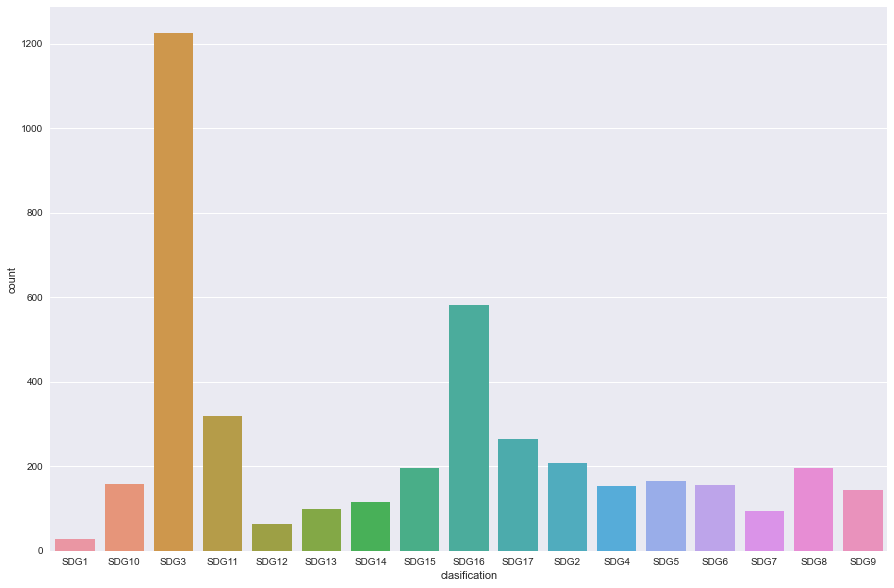

In [9]:
plt.figure(figsize = (15,10))
sns.countplot(df3.clasification)

In [10]:
Counter(df3.clasification).items()

dict_items([('SDG1', 29), ('SDG10', 159), ('SDG3', 1225), ('SDG11', 318), ('SDG12', 63), ('SDG13', 100), ('SDG14', 116), ('SDG15', 197), ('SDG16', 581), ('SDG17', 264), ('SDG2', 208), ('SDG4', 154), ('SDG5', 164), ('SDG6', 155), ('SDG7', 93), ('SDG8', 196), ('SDG9', 144)])

In [11]:
# GOAL 1: No Poverty
# GOAL 2: Zero Hunger
# GOAL 3: Good Health and Well-being
# GOAL 4: Quality Education
# GOAL 5: Gender Equality
# GOAL 6: Clean Water and Sanitation
# GOAL 7: Affordable and Clean Energy
# GOAL 8: Decent Work and Economic Growth
# GOAL 9: Industry, Innovation and Infrastructure
# GOAL 10: Reduced Inequality
# GOAL 11: Sustainable Cities and Communities
# GOAL 12: Responsible Consumption and Production
# GOAL 13: Climate Action
# GOAL 14: Life Below Water
# GOAL 15: Life on Land
# GOAL 16: Peace and Justice Strong Institutions
# GOAL 17: Partnerships to achieve the Goal

In [12]:
dict1 = {'SDG1': 'No Poverty', 'SDG10': 'Reduced Inequality', 'SDG3': 'Good Health and Well-being', 
 'SDG11': 'Sustainable Cities and Communities', 'SDG12': 'Responsible Consumption and Production', 
 'SDG13': 'Climate Action', 'SDG14':'Life Below Water', 'SDG15': 'Life on Land', 
 'SDG16': 'Peace and Justice Strong Institutions', 'SDG17': 'Partnerships to achieve the Goal', 
 'SDG2': 'Zero Hunger', 'SDG4': 'Quality Education', 'SDG5':'Gender Equality', 
 'SDG6': 'Clean Water and Sanitation', 'SDG7': 'Affordable and Clean Energy',
 'SDG8': 'Decent Work and Economic Growth', 'SDG9': 'Industry, Innovation and Infrastructure'}

In [13]:
df3['clasification'] = df3['clasification'].replace(dict1, regex= True)

In [14]:
#do No Poverty first
df_noPov = df3[df3['clasification'] == 'No Poverty']

In [15]:
sentence_cols = ['gpt2_0', 'gpt2_1', 'gpt2_2', 'gpt2_3', 'gpt2_4', 'gpt2_5', 'gpt2_6', 
                 'gpt2_7', 'gpt2_8', 'gpt2_9', 'gpt2_10', 'gpt2_11', 'gpt2_12', 'gpt2_13', 
                 'gpt2_14', 'gpt2_15', 'gpt2_16', 'gpt2_17', 'gpt2_18', 'gpt2_19', 'neo_0', 
                 'neo_1', 'neo_2', 'neo_3', 'neo_4', 'neo_5', 'neo_6', 'neo_7', 'neo_8', 'neo_9', 'neo_10',
                 'neo_11', 'neo_12', 'neo_13', 'neo_14', 'neo_15', 'neo_16', 'neo_17', 'neo_18', 'neo_19']

In [16]:
import re
LABEL = 'No Poverty' 
TRAIN_DATA =[]

for x in range(len(df_noPov)):
    for sen in sentence_cols:
        match = re.search(df_noPov['keyword'][x], df_noPov[sen][x])
        TRAIN_DATA.append((df_noPov[sen][x], {"entities": [(match.start(), match.end(), LABEL)]}))

In [17]:
TRAIN_DATA

[('"bop" countries to use drones to transport and search for their victims.\n\nThe Obama administration also wants to make drone technology available to foreign nations. The United States is not a member of a group of countries that are particularly opposed to drone',
  {'entities': [(0, 15, 'No Poverty')]}),
 ('"bop" countries including Russia are being held accountable for a spike in asylum-seekers.\n\nThe Syrian refugee crisis and the lack of access to medical care make that situation even more difficult for refugees who are fleeing war and terrorism in the Middle',
  {'entities': [(0, 15, 'No Poverty')]}),
 ('"bop" countries like Turkey and Qatar.\n\nThe issue of the United States\' legal right to engage in bilateral nuclear-armed conflict has been complicated by concerns that Washington was forced to back down after Turkey\'s move.\n\nDealing',
  {'entities': [(0, 15, 'No Poverty')]}),
 ('"bop" countries like China – are a source of immense danger since these entities cannot be al

In [18]:
# Add the new label to ner
ner.add_label(LABEL)

# Resume training
optimizer = nlp.resume_training()
move_names = list(ner.move_names)

# List of pipes you want to train
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]

# List of pipes which should remain unaffected in training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [19]:
# Importing requirements
from spacy.util import minibatch, compounding
import random

# Begin training by disabling other pipeline components
with nlp.disable_pipes(*other_pipes) :
    sizes = compounding(1.0, 4.0, 1.001)
    # Training for 30 iterations     
    for itn in range(30):
        # shuffle examples before training
        random.shuffle(TRAIN_DATA)
        # batch up the examples using spaCy's minibatch
        batches = minibatch(TRAIN_DATA, size=sizes)
        # ictionary to store losses
        losses = {}
        for batch in batches:
            texts, annotations = zip(*batch)
            # Calling update() over the iteration
            nlp.update(texts, annotations, sgd=optimizer, drop=0.35, losses=losses)
            print("Losses", losses)

Losses {'ner': 39.91558450285811}
Losses {'ner': 87.24283486430068}
Losses {'ner': 133.74837833468337}
Losses {'ner': 176.05197131459136}
Losses {'ner': 223.45935159747023}
Losses {'ner': 266.7254754585447}
Losses {'ner': 312.7882372123422}
Losses {'ner': 356.4092265210347}
Losses {'ner': 394.6898248913931}
Losses {'ner': 439.48824387893546}
Losses {'ner': 458.41820159659255}
Losses {'ner': 497.99551446721307}
Losses {'ner': 541.5116748026048}
Losses {'ner': 584.5099638155516}
Losses {'ner': 635.8711601097457}
Losses {'ner': 679.6008269255835}
Losses {'ner': 724.3305193120468}
Losses {'ner': 774.3384337497264}
Losses {'ner': 815.8751819466561}
Losses {'ner': 856.6535447488859}
Losses {'ner': 901.6613100452669}
Losses {'ner': 949.4842364545766}
Losses {'ner': 985.2003039810661}
Losses {'ner': 1025.3752078383113}
Losses {'ner': 1071.7087958535994}
Losses {'ner': 1103.842774375691}
Losses {'ner': 1151.836490673595}
Losses {'ner': 1193.4989331864053}
Losses {'ner': 1243.0687131859595}
Loss

Losses {'ner': 9172.912631415244}
Losses {'ner': 9211.727491570293}
Losses {'ner': 9242.891914741374}
Losses {'ner': 9285.945774782687}
Losses {'ner': 9321.603743503108}
Losses {'ner': 9361.060068076948}
Losses {'ner': 9396.428217909188}
Losses {'ner': 9427.925942497915}
Losses {'ner': 9463.286165012052}
Losses {'ner': 9500.73948398105}
Losses {'ner': 9538.801226456539}
Losses {'ner': 9579.411302439757}
Losses {'ner': 9619.918106327246}
Losses {'ner': 9643.341549906245}
Losses {'ner': 9677.448221087985}
Losses {'ner': 9720.500248101953}
Losses {'ner': 9730.979927990067}
Losses {'ner': 9770.72592732631}
Losses {'ner': 9802.75092823286}
Losses {'ner': 9840.129101863777}
Losses {'ner': 9877.911223396432}
Losses {'ner': 9917.983522226807}
Losses {'ner': 9951.448640046705}
Losses {'ner': 9992.919085113395}
Losses {'ner': 10026.256432661152}
Losses {'ner': 10061.199612429662}
Losses {'ner': 10097.180411102896}
Losses {'ner': 10133.861951135745}
Losses {'ner': 10161.791328959696}
Losses {'ner

Losses {'ner': 17383.040406300093}
Losses {'ner': 17413.826807329537}
Losses {'ner': 17447.588513326238}
Losses {'ner': 17477.451748575888}
Losses {'ner': 17509.92749417642}
Losses {'ner': 17533.00074102944}
Losses {'ner': 17562.21381006441}
Losses {'ner': 17593.6582311142}
Losses {'ner': 17633.23002540258}
Losses {'ner': 17656.72616880057}
Losses {'ner': 17698.102152048803}
Losses {'ner': 17728.970607204672}
Losses {'ner': 17748.109525817814}
Losses {'ner': 17784.268937394412}
Losses {'ner': 17812.244630924466}
Losses {'ner': 17837.828513543074}
Losses {'ner': 17873.97335014406}
Losses {'ner': 17901.44344141289}
Losses {'ner': 17934.585666458366}
Losses {'ner': 17968.781715120433}
Losses {'ner': 18009.386856922192}
Losses {'ner': 18038.828323300822}
Losses {'ner': 18077.668979780763}
Losses {'ner': 18109.469742672532}
Losses {'ner': 18137.317816826995}
Losses {'ner': 18167.251615250265}
Losses {'ner': 18208.001321272357}
Losses {'ner': 18242.83019253603}
Losses {'ner': 18273.596943893

Losses {'ner': 25904.37655396871}
Losses {'ner': 25961.06669293828}
Losses {'ner': 26012.577603596445}
Losses {'ner': 26076.15677233338}
Losses {'ner': 26144.232219535108}
Losses {'ner': 26208.07375061763}
Losses {'ner': 26267.96326146526}
Losses {'ner': 26343.488651017375}
Losses {'ner': 26393.076141996957}
Losses {'ner': 26463.32269725827}
Losses {'ner': 26541.967334693945}
Losses {'ner': 26593.10901094479}
Losses {'ner': 26649.205310760713}
Losses {'ner': 26726.398316724873}
Losses {'ner': 26780.800718529797}
Losses {'ner': 26848.78805952025}
Losses {'ner': 26909.15870771063}
Losses {'ner': 26968.87405043919}
Losses {'ner': 27027.443901420425}
Losses {'ner': 27081.219402805757}
Losses {'ner': 27144.831725076627}
Losses {'ner': 27216.416494027566}
Losses {'ner': 27274.266045038443}
Losses {'ner': 27338.680829648714}
Losses {'ner': 27401.881378863793}
Losses {'ner': 27461.418778979074}
Losses {'ner': 27511.230647624325}
Losses {'ner': 27561.336981431436}
Losses {'ner': 27629.329138950

Losses {'ner': 1966.144998312404}
Losses {'ner': 2018.3372706774971}
Losses {'ner': 2076.805492535641}
Losses {'ner': 2115.8223516200087}
Losses {'ner': 2169.1060403142474}
Losses {'ner': 2230.0654788989923}
Losses {'ner': 2273.5879391044728}
Losses {'ner': 2323.4171155816293}
Losses {'ner': 2373.1532846069313}
Losses {'ner': 2434.7962644225336}
Losses {'ner': 2490.1679741269327}
Losses {'ner': 2553.720276830194}
Losses {'ner': 2609.8916686581797}
Losses {'ner': 2673.3058801176376}
Losses {'ner': 2729.921583417279}
Losses {'ner': 2791.8411756934947}
Losses {'ner': 2846.4889967510826}
Losses {'ner': 2915.924098466232}
Losses {'ner': 2962.7108075364376}
Losses {'ner': 3026.538920362189}
Losses {'ner': 3083.8933950091596}
Losses {'ner': 3138.7641639510985}
Losses {'ner': 3200.7422742570634}
Losses {'ner': 3270.9580598945613}
Losses {'ner': 3336.2656569356914}
Losses {'ner': 3398.6147880281205}
Losses {'ner': 3457.549536953389}
Losses {'ner': 3521.602845663845}
Losses {'ner': 3581.03553457

Losses {'ner': 18621.488074452638}
Losses {'ner': 18698.8747773031}
Losses {'ner': 18776.451838419795}
Losses {'ner': 18867.04772086537}
Losses {'ner': 18964.17206718123}
Losses {'ner': 19060.123317376732}
Losses {'ner': 19140.00559021628}
Losses {'ner': 19217.47966287008}
Losses {'ner': 19304.423282419353}
Losses {'ner': 19399.460289155155}
Losses {'ner': 19482.63760292998}
Losses {'ner': 19569.273936514765}
Losses {'ner': 19666.117221330314}
Losses {'ner': 19758.73319211325}
Losses {'ner': 19850.97369596085}
Losses {'ner': 19945.828767982333}
Losses {'ner': 20028.928220787107}
Losses {'ner': 20119.817553349792}
Losses {'ner': 20200.1849141801}
Losses {'ner': 20271.186478373616}
Losses {'ner': 20359.32313775739}
Losses {'ner': 20456.460915383905}
Losses {'ner': 20526.39649182281}
Losses {'ner': 20620.051349219888}
Losses {'ner': 20715.19992905578}
Losses {'ner': 20787.930953499883}
Losses {'ner': 20873.00628416708}
Losses {'ner': 20962.742137570887}
Losses {'ner': 21053.611887295752}


Losses {'ner': 6997.2564612179995}
Losses {'ner': 7107.2381387501955}
Losses {'ner': 7202.476029351354}
Losses {'ner': 7310.602437034249}
Losses {'ner': 7358.074914947152}
Losses {'ner': 7467.108387246728}
Losses {'ner': 7576.723226681352}
Losses {'ner': 7685.8491937071085}
Losses {'ner': 7787.545987144113}
Losses {'ner': 7906.912172749639}
Losses {'ner': 8002.382374122739}
Losses {'ner': 8108.013685062528}
Losses {'ner': 8225.040245249867}
Losses {'ner': 8330.417662456632}
Losses {'ner': 8443.995021000504}
Losses {'ner': 8571.52724160254}
Losses {'ner': 8678.311618223786}
Losses {'ner': 8771.32853205502}
Losses {'ner': 8871.636801227927}
Losses {'ner': 8987.326224550605}
Losses {'ner': 9108.34380839765}
Losses {'ner': 9212.923197612166}
Losses {'ner': 9323.216474160552}
Losses {'ner': 9439.950392231345}
Losses {'ner': 9560.003237232566}
Losses {'ner': 9681.011363968253}
Losses {'ner': 9789.435652062297}
Losses {'ner': 9885.155546352267}
Losses {'ner': 9982.334288403392}
Losses {'ner':

Losses {'ner': 1301.858119416982}
Losses {'ner': 1414.105827499181}
Losses {'ner': 1527.0119584687054}
Losses {'ner': 1630.8666846640408}
Losses {'ner': 1723.9777913577855}
Losses {'ner': 1838.2724357135594}
Losses {'ner': 1938.987275172025}
Losses {'ner': 2033.1471318490803}
Losses {'ner': 2148.305249322206}
Losses {'ner': 2249.534370291978}
Losses {'ner': 2367.9765031822026}
Losses {'ner': 2474.0784845240414}
Losses {'ner': 2575.9845797009766}
Losses {'ner': 2691.8365352340043}
Losses {'ner': 2800.1891584582627}
Losses {'ner': 2914.7145531363785}
Losses {'ner': 3013.45166291669}
Losses {'ner': 3110.527400393039}
Losses {'ner': 3227.33007420972}
Losses {'ner': 3337.0908494479954}
Losses {'ner': 3450.386801291257}
Losses {'ner': 3541.2849486358464}
Losses {'ner': 3654.130891252309}
Losses {'ner': 3760.5378605611622}
Losses {'ner': 3830.2643973119557}
Losses {'ner': 3929.1245939023793}
Losses {'ner': 4035.0045726783574}
Losses {'ner': 4148.918425966054}
Losses {'ner': 4258.4755404777825

Losses {'ner': 26411.773365614004}
Losses {'ner': 26508.095480975695}
Losses {'ner': 26623.13069528062}
Losses {'ner': 26734.66835337598}
Losses {'ner': 26848.230777082033}
Losses {'ner': 26946.763908994384}
Losses {'ner': 27062.07314921636}
Losses {'ner': 27169.193648350425}
Losses {'ner': 27288.24648649711}
Losses {'ner': 27381.072310102172}
Losses {'ner': 27480.11645902414}
Losses {'ner': 27593.931273114868}
Losses {'ner': 27709.43054140825}
Losses {'ner': 27802.81631184835}
Losses {'ner': 27906.484739017673}
Losses {'ner': 27996.92960412521}
Losses {'ner': 28109.533153844066}
Losses {'ner': 28223.116293025203}
Losses {'ner': 28320.36663020868}
Losses {'ner': 28431.584984374233}
Losses {'ner': 28517.879028421827}
Losses {'ner': 28624.076849919744}
Losses {'ner': 28713.872753483243}
Losses {'ner': 28807.741074007936}
Losses {'ner': 28910.453380328603}
Losses {'ner': 29012.15864114184}
Losses {'ner': 29130.39381192345}
Losses {'ner': 29223.02165572066}
Losses {'ner': 29326.49421457667

Losses {'ner': 20574.859261902515}
Losses {'ner': 20678.74701014394}
Losses {'ner': 20796.129323753063}
Losses {'ner': 20901.662036331836}
Losses {'ner': 20991.64544776315}
Losses {'ner': 21117.0173082673}
Losses {'ner': 21214.6528246128}
Losses {'ner': 21321.946530493442}
Losses {'ner': 21430.48035982484}
Losses {'ner': 21536.349620076362}
Losses {'ner': 21622.319245787803}
Losses {'ner': 21739.652731629554}
Losses {'ner': 21849.57698807353}
Losses {'ner': 21960.685345979873}
Losses {'ner': 22070.048457952682}
Losses {'ner': 22169.430718200747}
Losses {'ner': 22267.808893220965}
Losses {'ner': 22370.23548247153}
Losses {'ner': 22469.215885179583}
Losses {'ner': 22561.222599911038}
Losses {'ner': 22660.93720333511}
Losses {'ner': 22766.07166700298}
Losses {'ner': 22867.66229586536}
Losses {'ner': 22965.572009610478}
Losses {'ner': 23080.452780055348}
Losses {'ner': 23191.194712894503}
Losses {'ner': 23283.080542343203}
Losses {'ner': 23392.261382239405}
Losses {'ner': 23497.54239489371

Losses {'ner': 15179.950604698155}
Losses {'ner': 15267.591209849808}
Losses {'ner': 15367.1202140362}
Losses {'ner': 15467.239443561528}
Losses {'ner': 15568.948033711407}
Losses {'ner': 15658.004922781605}
Losses {'ner': 15749.569789592642}
Losses {'ner': 15849.903730962891}
Losses {'ner': 15956.617036900017}
Losses {'ner': 16058.102915963624}
Losses {'ner': 16158.082791826222}
Losses {'ner': 16273.334881445859}
Losses {'ner': 16376.2375837476}
Losses {'ner': 16473.46079581091}
Losses {'ner': 16575.256922057364}
Losses {'ner': 16675.800517729018}
Losses {'ner': 16774.86049806187}
Losses {'ner': 16875.191328218672}
Losses {'ner': 16978.518640330527}
Losses {'ner': 17091.598006716464}
Losses {'ner': 17197.146610012744}
Losses {'ner': 17300.97261502454}
Losses {'ner': 17423.229574105237}
Losses {'ner': 17529.856091758702}
Losses {'ner': 17623.973233243916}
Losses {'ner': 17721.827971777413}
Losses {'ner': 17831.5914343209}
Losses {'ner': 17938.076057335827}
Losses {'ner': 18053.05851366

Losses {'ner': 10110.230056337547}
Losses {'ner': 10206.819021038245}
Losses {'ner': 10318.063761464786}
Losses {'ner': 10435.259233943652}
Losses {'ner': 10528.82296354277}
Losses {'ner': 10624.761889583897}
Losses {'ner': 10715.29942042334}
Losses {'ner': 10821.389989442658}
Losses {'ner': 10931.412254906725}
Losses {'ner': 11023.551403976511}
Losses {'ner': 11137.354916072916}
Losses {'ner': 11245.648457742762}
Losses {'ner': 11349.130982018542}
Losses {'ner': 11448.35606435826}
Losses {'ner': 11545.073199310806}
Losses {'ner': 11633.151834407356}
Losses {'ner': 11735.202606776264}
Losses {'ner': 11842.562787154224}
Losses {'ner': 11944.349230864551}
Losses {'ner': 12044.708757856395}
Losses {'ner': 12146.63618109515}
Losses {'ner': 12231.386683562305}
Losses {'ner': 12330.513107517269}
Losses {'ner': 12441.491768875625}
Losses {'ner': 12532.000384548213}
Losses {'ner': 12626.612193488982}
Losses {'ner': 12706.213786044624}
Losses {'ner': 12798.98376689246}
Losses {'ner': 12914.6381

Losses {'ner': 5250.1266005039215}
Losses {'ner': 5334.830464482307}
Losses {'ner': 5436.097604453564}
Losses {'ner': 5535.52258592844}
Losses {'ner': 5638.500559687614}
Losses {'ner': 5733.273706316948}
Losses {'ner': 5835.659564673901}
Losses {'ner': 5937.202327430248}
Losses {'ner': 6031.690753638744}
Losses {'ner': 6118.248920857906}
Losses {'ner': 6213.412162363529}
Losses {'ner': 6303.2712523937225}
Losses {'ner': 6414.26659321785}
Losses {'ner': 6513.810805141926}
Losses {'ner': 6607.1055121943355}
Losses {'ner': 6712.738176755607}
Losses {'ner': 6814.742917925119}
Losses {'ner': 6928.531946659088}
Losses {'ner': 7028.269243776798}
Losses {'ner': 7128.25380641222}
Losses {'ner': 7227.0183165073395}
Losses {'ner': 7308.921966133174}
Losses {'ner': 7408.859967266675}
Losses {'ner': 7468.287358795758}
Losses {'ner': 7567.811426078435}
Losses {'ner': 7669.671669935342}
Losses {'ner': 7760.8772575608455}
Losses {'ner': 7862.314523493405}
Losses {'ner': 7947.711759125348}
Losses {'ner

Losses {'ner': 28829.914641278796}
Losses {'ner': 97.47378555685282}
Losses {'ner': 186.96674696356058}
Losses {'ner': 295.83209244161844}
Losses {'ner': 391.959021307528}
Losses {'ner': 486.66666147857904}
Losses {'ner': 596.5484367385507}
Losses {'ner': 694.848244227469}
Losses {'ner': 792.2793171331286}
Losses {'ner': 888.6238889619708}
Losses {'ner': 979.8270579501987}
Losses {'ner': 1081.9753702804446}
Losses {'ner': 1181.2110918983817}
Losses {'ner': 1281.2075067088008}
Losses {'ner': 1386.9897484108806}
Losses {'ner': 1459.2835335060954}
Losses {'ner': 1546.0677770003676}
Losses {'ner': 1642.1795599088073}
Losses {'ner': 1724.1807855591178}
Losses {'ner': 1804.584739588201}
Losses {'ner': 1920.0289862379432}
Losses {'ner': 2023.3853771910071}
Losses {'ner': 2130.8082070574164}
Losses {'ner': 2222.3563321456313}
Losses {'ner': 2315.0726504847407}
Losses {'ner': 2403.103772841394}
Losses {'ner': 2487.4985601231456}
Losses {'ner': 2562.484368376434}
Losses {'ner': 2661.702654056251

Losses {'ner': 23394.216340531595}
Losses {'ner': 23508.059595813043}
Losses {'ner': 23585.84488021303}
Losses {'ner': 23681.83072571922}
Losses {'ner': 23782.383563091047}
Losses {'ner': 23873.86211495567}
Losses {'ner': 23969.14979121927}
Losses {'ner': 24056.948376216926}
Losses {'ner': 24152.612995364703}
Losses {'ner': 24258.771359183826}
Losses {'ner': 24350.17266921047}
Losses {'ner': 24446.785728373565}
Losses {'ner': 24531.4641176844}
Losses {'ner': 24639.736321487464}
Losses {'ner': 24716.83611430321}
Losses {'ner': 24838.75236053858}
Losses {'ner': 24939.332557574846}
Losses {'ner': 25031.581617192365}
Losses {'ner': 25116.733974174596}
Losses {'ner': 25217.920065359212}
Losses {'ner': 25301.325327054597}
Losses {'ner': 25387.47903378401}
Losses {'ner': 25489.816878275014}
Losses {'ner': 25579.19595475588}
Losses {'ner': 25677.8663247386}
Losses {'ner': 25790.339460209943}
Losses {'ner': 25895.389389739372}
Losses {'ner': 26011.528528497554}
Losses {'ner': 26108.502147869207

Losses {'ner': 18587.116426381574}
Losses {'ner': 18690.441390726075}
Losses {'ner': 18810.10735866736}
Losses {'ner': 18920.162679407105}
Losses {'ner': 19032.65566616069}
Losses {'ner': 19137.678378987417}
Losses {'ner': 19239.48485999118}
Losses {'ner': 19330.308754432306}
Losses {'ner': 19431.47836195241}
Losses {'ner': 19540.830773520574}
Losses {'ner': 19628.454917955503}
Losses {'ner': 19731.476834821806}
Losses {'ner': 19823.317588019476}
Losses {'ner': 19909.10625018488}
Losses {'ner': 20005.4495358945}
Losses {'ner': 20093.1701697291}
Losses {'ner': 20187.254291746125}
Losses {'ner': 20274.130002307997}
Losses {'ner': 20364.633890706406}
Losses {'ner': 20460.023916262493}
Losses {'ner': 20575.604843515262}
Losses {'ner': 20667.746440775052}
Losses {'ner': 20766.17851262103}
Losses {'ner': 20857.87399323593}
Losses {'ner': 20969.412150162563}
Losses {'ner': 21062.47992126952}
Losses {'ner': 21165.773666697845}
Losses {'ner': 21270.378838974342}
Losses {'ner': 21373.88327344070

Losses {'ner': 13885.594140278059}
Losses {'ner': 13970.685146825272}
Losses {'ner': 14089.21836687799}
Losses {'ner': 14192.204272465664}
Losses {'ner': 14292.538705928135}
Losses {'ner': 14390.655470518279}
Losses {'ner': 14479.995713142562}
Losses {'ner': 14589.289115248132}
Losses {'ner': 14693.648380098748}
Losses {'ner': 14805.13047617476}
Losses {'ner': 14912.067639170098}
Losses {'ner': 15007.376040397095}
Losses {'ner': 15118.871212540078}
Losses {'ner': 15238.430200545}
Losses {'ner': 15324.510320184636}
Losses {'ner': 15431.399759067106}
Losses {'ner': 15531.811335755396}
Losses {'ner': 15629.863672299194}
Losses {'ner': 15727.176360053825}
Losses {'ner': 15818.6673756073}
Losses {'ner': 15911.00355873804}
Losses {'ner': 16010.554830355453}
Losses {'ner': 16106.442741317558}
Losses {'ner': 16205.88684257667}
Losses {'ner': 16299.33090487204}
Losses {'ner': 16397.79151374183}
Losses {'ner': 16495.965797365527}
Losses {'ner': 16581.385266453843}
Losses {'ner': 16680.0343481012

Losses {'ner': 8946.189091823995}
Losses {'ner': 9036.22669031471}
Losses {'ner': 9125.756926737726}
Losses {'ner': 9229.135363332927}
Losses {'ner': 9319.57473718375}
Losses {'ner': 9426.514444582164}
Losses {'ner': 9520.991681270301}
Losses {'ner': 9614.405970148742}
Losses {'ner': 9722.355397216976}
Losses {'ner': 9818.82036691159}
Losses {'ner': 9913.925317563117}
Losses {'ner': 10025.681060768664}
Losses {'ner': 10130.031339861453}
Losses {'ner': 10241.489747442305}
Losses {'ner': 10341.560104049742}
Losses {'ner': 10423.495917715132}
Losses {'ner': 10522.002244867384}
Losses {'ner': 10621.542388416827}
Losses {'ner': 10715.140767551959}
Losses {'ner': 10807.254851855338}
Losses {'ner': 10923.746690548956}
Losses {'ner': 11022.609226979315}
Losses {'ner': 11119.970075763762}
Losses {'ner': 11236.379091657698}
Losses {'ner': 11340.568867318332}
Losses {'ner': 11421.271739594638}
Losses {'ner': 11525.214936487377}
Losses {'ner': 11618.694133095443}
Losses {'ner': 11703.920833401382}

Losses {'ner': 4026.3361575659364}
Losses {'ner': 4120.519412165508}
Losses {'ner': 4217.259162640199}
Losses {'ner': 4317.296323394403}
Losses {'ner': 4420.25961718522}
Losses {'ner': 4508.893869495019}
Losses {'ner': 4613.234845196828}
Losses {'ner': 4694.816482959315}
Losses {'ner': 4773.105095325038}
Losses {'ner': 4872.092616377398}
Losses {'ner': 4975.796238003299}
Losses {'ner': 5083.423565207049}
Losses {'ner': 5166.693368952721}
Losses {'ner': 5235.420352112502}
Losses {'ner': 5319.014255147427}
Losses {'ner': 5420.575107913464}
Losses {'ner': 5510.2533944658935}
Losses {'ner': 5600.4640598110855}
Losses {'ner': 5690.327899914235}
Losses {'ner': 5785.834479790181}
Losses {'ner': 5878.783318143338}
Losses {'ner': 5969.205837588757}
Losses {'ner': 6077.103597741574}
Losses {'ner': 6182.8076137416065}
Losses {'ner': 6273.238079350442}
Losses {'ner': 6370.4950728826225}
Losses {'ner': 6485.518898766488}
Losses {'ner': 6592.540046196431}
Losses {'ner': 6681.8427099995315}
Losses {'

Losses {'ner': 27274.23522435152}
Losses {'ner': 27368.629542038077}
Losses {'ner': 27458.330115603516}
Losses {'ner': 27566.30735187442}
Losses {'ner': 27671.01631044061}
Losses {'ner': 27766.08361692936}
Losses {'ner': 27864.684774117777}
Losses {'ner': 27967.129000561545}
Losses {'ner': 28045.154388087103}
Losses {'ner': 93.4391541481018}
Losses {'ner': 201.53995072841644}
Losses {'ner': 294.5335967540741}
Losses {'ner': 387.6080299913883}
Losses {'ner': 474.85984490811825}
Losses {'ner': 557.0221969597042}
Losses {'ner': 651.2812849991024}
Losses {'ner': 753.2683942131698}
Losses {'ner': 858.7865453083068}
Losses {'ner': 965.0187459308654}
Losses {'ner': 1074.0577929299325}
Losses {'ner': 1188.9276454728097}
Losses {'ner': 1298.639042980969}
Losses {'ner': 1401.8732106760144}
Losses {'ner': 1518.259198077023}
Losses {'ner': 1604.407672174275}
Losses {'ner': 1712.363734550774}
Losses {'ner': 1821.4014515951276}
Losses {'ner': 1917.0794490650296}
Losses {'ner': 2007.057764776051}
Los

Losses {'ner': 22292.944878519047}
Losses {'ner': 22401.38482332276}
Losses {'ner': 22500.88065490173}
Losses {'ner': 22596.80988055514}
Losses {'ner': 22695.863977790345}
Losses {'ner': 22790.898784377147}
Losses {'ner': 22881.762297250796}
Losses {'ner': 22967.411107637454}
Losses {'ner': 23064.557513334323}
Losses {'ner': 23166.48442278104}
Losses {'ner': 23266.934141286183}
Losses {'ner': 23380.57464958029}
Losses {'ner': 23480.461166777182}
Losses {'ner': 23583.03275004821}
Losses {'ner': 23685.811873672996}
Losses {'ner': 23781.957108377013}
Losses {'ner': 23882.261781512294}
Losses {'ner': 23983.123407511506}
Losses {'ner': 24072.754707908724}
Losses {'ner': 24167.413988864515}
Losses {'ner': 24264.606293773744}
Losses {'ner': 24378.778624987695}
Losses {'ner': 24477.052082395647}
Losses {'ner': 24564.634869194124}
Losses {'ner': 24657.962635374162}
Losses {'ner': 24757.58093760023}
Losses {'ner': 24855.787462672684}
Losses {'ner': 24938.856875470374}
Losses {'ner': 25046.441565

Losses {'ner': 17378.126854166156}
Losses {'ner': 17460.930087432032}
Losses {'ner': 17549.468051535776}
Losses {'ner': 17650.01328377216}
Losses {'ner': 17758.158921641996}
Losses {'ner': 17871.762989027193}
Losses {'ner': 17975.382380826166}
Losses {'ner': 18063.97237811773}
Losses {'ner': 18172.790851635626}
Losses {'ner': 18261.050461096456}
Losses {'ner': 18348.930976195028}
Losses {'ner': 18459.687032801798}
Losses {'ner': 18540.1455809006}
Losses {'ner': 18648.98731554835}
Losses {'ner': 18742.178364230087}
Losses {'ner': 18851.329182935646}
Losses {'ner': 18959.77462239354}
Losses {'ner': 19051.379479897907}
Losses {'ner': 19132.101043296745}
Losses {'ner': 19233.223466885975}
Losses {'ner': 19327.74526048987}
Losses {'ner': 19423.612793629756}
Losses {'ner': 19527.16588557302}
Losses {'ner': 19622.25252949237}
Losses {'ner': 19711.91378652095}
Losses {'ner': 19812.57072194456}
Losses {'ner': 19908.746041496983}
Losses {'ner': 20000.24460073351}
Losses {'ner': 20061.68662019609

Losses {'ner': 13088.774553230498}
Losses {'ner': 13188.753100386355}
Losses {'ner': 13298.677579155657}
Losses {'ner': 13404.13030778477}
Losses {'ner': 13498.279589644168}
Losses {'ner': 13599.048700741027}
Losses {'ner': 13695.274225345347}
Losses {'ner': 13800.01212011883}
Losses {'ner': 13917.327961503062}
Losses {'ner': 14014.016867457423}
Losses {'ner': 14119.576131968293}
Losses {'ner': 14217.624763397966}
Losses {'ner': 14312.952181725297}
Losses {'ner': 14405.08223306993}
Losses {'ner': 14523.115899680648}
Losses {'ner': 14626.489241092}
Losses {'ner': 14724.780707089696}
Losses {'ner': 14831.024957685266}
Losses {'ner': 14927.797329215799}
Losses {'ner': 15025.471778301988}
Losses {'ner': 15118.533919064794}
Losses {'ner': 15213.518304555211}
Losses {'ner': 15318.171508042607}
Losses {'ner': 15410.729196815286}
Losses {'ner': 15517.504626183305}
Losses {'ner': 15613.79783919314}
Losses {'ner': 15711.103561340366}
Losses {'ner': 15815.827629266772}
Losses {'ner': 15913.247910

Losses {'ner': 8075.582806842402}
Losses {'ner': 8172.923121523112}
Losses {'ner': 8265.377237271518}
Losses {'ner': 8362.384285937995}
Losses {'ner': 8457.820948015898}
Losses {'ner': 8552.930633138865}
Losses {'ner': 8637.340201359242}
Losses {'ner': 8734.299258451909}
Losses {'ner': 8828.15524373576}
Losses {'ner': 8910.953914385289}
Losses {'ner': 8999.675173621625}
Losses {'ner': 9092.984444331378}
Losses {'ner': 9193.430133532733}
Losses {'ner': 9290.968550872058}
Losses {'ner': 9389.615225385875}
Losses {'ner': 9479.539527725428}
Losses {'ner': 9568.048607643694}
Losses {'ner': 9671.667725410312}
Losses {'ner': 9768.753005053848}
Losses {'ner': 9871.136378731579}
Losses {'ner': 9967.294294070452}
Losses {'ner': 10073.998798321933}
Losses {'ner': 10179.778881262988}
Losses {'ner': 10272.791696917266}
Losses {'ner': 10360.423384916037}
Losses {'ner': 10451.874722193927}
Losses {'ner': 10550.722514104098}
Losses {'ner': 10636.595550458878}
Losses {'ner': 10727.526067137718}
Losses 

Losses {'ner': 2779.651550579816}
Losses {'ner': 2878.170643698133}
Losses {'ner': 2990.060323487676}
Losses {'ner': 3081.5561246980797}
Losses {'ner': 3183.4360120032798}
Losses {'ner': 3285.557808134414}
Losses {'ner': 3393.0678857301245}
Losses {'ner': 3484.1670789007912}
Losses {'ner': 3582.2476870302926}
Losses {'ner': 3697.774582195736}
Losses {'ner': 3792.5139302794705}
Losses {'ner': 3892.130752581812}
Losses {'ner': 4002.4598943178426}
Losses {'ner': 4099.928521532274}
Losses {'ner': 4189.912661809183}
Losses {'ner': 4282.839147109247}
Losses {'ner': 4370.082585621334}
Losses {'ner': 4470.67390661285}
Losses {'ner': 4574.042873490311}
Losses {'ner': 4666.6793887500535}
Losses {'ner': 4749.492823350884}
Losses {'ner': 4846.825039718009}
Losses {'ner': 4941.493455502845}
Losses {'ner': 5027.02371964202}
Losses {'ner': 5119.769691709138}
Losses {'ner': 5209.1083561216365}
Losses {'ner': 5318.27224272833}
Losses {'ner': 5405.576964717067}
Losses {'ner': 5501.777429740585}
Losses {

Losses {'ner': 26008.39170694846}
Losses {'ner': 26090.671676163853}
Losses {'ner': 26180.276264791668}
Losses {'ner': 26271.804416184605}
Losses {'ner': 26377.884505574882}
Losses {'ner': 26466.361020868004}
Losses {'ner': 26569.090736841143}
Losses {'ner': 26667.922819351137}
Losses {'ner': 26764.30022602278}
Losses {'ner': 26864.235595193983}
Losses {'ner': 26950.87539705384}
Losses {'ner': 27048.792356354475}
Losses {'ner': 27148.08173779893}
Losses {'ner': 27218.39117030549}
Losses {'ner': 27299.266959947825}
Losses {'ner': 27409.449966472865}
Losses {'ner': 27502.377728713036}
Losses {'ner': 27589.92085702467}
Losses {'ner': 27690.10971857357}
Losses {'ner': 27792.32153190422}
Losses {'ner': 27885.718460631848}
Losses {'ner': 93.58239119499922}
Losses {'ner': 196.77632824331522}
Losses {'ner': 301.35594210773706}
Losses {'ner': 399.80411133915186}
Losses {'ner': 492.0314613059163}
Losses {'ner': 582.3568505719304}
Losses {'ner': 671.3531742468476}
Losses {'ner': 761.6405533924699

Losses {'ner': 20852.783509887522}
Losses {'ner': 20944.83969787485}
Losses {'ner': 21034.756744510727}
Losses {'ner': 21128.08119863947}
Losses {'ner': 21220.959042257862}
Losses {'ner': 21320.352270252304}
Losses {'ner': 21418.10753608425}
Losses {'ner': 21503.334384448128}
Losses {'ner': 21585.307702667313}
Losses {'ner': 21682.080038554268}
Losses {'ner': 21782.502547062235}
Losses {'ner': 21874.948079890804}
Losses {'ner': 21964.289888984757}
Losses {'ner': 22065.13507024129}
Losses {'ner': 22151.405650384026}
Losses {'ner': 22247.92741609295}
Losses {'ner': 22344.772198266583}
Losses {'ner': 22448.443270719843}
Losses {'ner': 22533.007739565568}
Losses {'ner': 22638.260702452855}
Losses {'ner': 22733.926862678723}
Losses {'ner': 22836.2132403024}
Losses {'ner': 22937.892444289522}
Losses {'ner': 23042.85955540021}
Losses {'ner': 23152.560409224825}
Losses {'ner': 23233.029035247164}
Losses {'ner': 23331.008851087885}
Losses {'ner': 23433.29510907014}
Losses {'ner': 23540.01775828

Losses {'ner': 16000.8770342106}
Losses {'ner': 16100.215527975}
Losses {'ner': 16194.75726183597}
Losses {'ner': 16297.47564085666}
Losses {'ner': 16396.618290030397}
Losses {'ner': 16487.026543014683}
Losses {'ner': 16590.16182743851}
Losses {'ner': 16694.460782163776}
Losses {'ner': 16808.718737476505}
Losses {'ner': 16886.758431964554}
Losses {'ner': 16983.735704653896}
Losses {'ner': 17086.92979078833}
Losses {'ner': 17180.791106157936}
Losses {'ner': 17271.40193899814}
Losses {'ner': 17376.5746681327}
Losses {'ner': 17473.64982339088}
Losses {'ner': 17572.224512183107}
Losses {'ner': 17671.44666107837}
Losses {'ner': 17757.82940825168}
Losses {'ner': 17873.61902847234}
Losses {'ner': 17961.760835104622}
Losses {'ner': 18031.399059423245}
Losses {'ner': 18116.164274302486}
Losses {'ner': 18219.684215066198}
Losses {'ner': 18329.942631659273}
Losses {'ner': 18421.124207356188}
Losses {'ner': 18515.90532981715}
Losses {'ner': 18617.06035148463}
Losses {'ner': 18713.28658341727}
Loss

Losses {'ner': 11192.48842888244}
Losses {'ner': 11293.924929193337}
Losses {'ner': 11345.908584169229}
Losses {'ner': 11451.82573228248}
Losses {'ner': 11547.153062253288}
Losses {'ner': 11641.327516584686}
Losses {'ner': 11752.023801772884}
Losses {'ner': 11833.206981628231}
Losses {'ner': 11918.748425691418}
Losses {'ner': 12013.53832426577}
Losses {'ner': 12104.791187434486}
Losses {'ner': 12202.74593105822}
Losses {'ner': 12287.4672601512}
Losses {'ner': 12399.955872761115}
Losses {'ner': 12499.119582401618}
Losses {'ner': 12601.936007129058}
Losses {'ner': 12678.014131056174}
Losses {'ner': 12763.545659022435}
Losses {'ner': 12855.753761516913}
Losses {'ner': 12950.565260248288}
Losses {'ner': 13045.784446256264}
Losses {'ner': 13143.214966135129}
Losses {'ner': 13229.50761755}
Losses {'ner': 13313.46482446979}
Losses {'ner': 13405.95802012275}
Losses {'ner': 13499.130458386644}
Losses {'ner': 13591.403666617378}
Losses {'ner': 13685.26421313177}
Losses {'ner': 13783.863594459399

Losses {'ner': 6297.634058735333}
Losses {'ner': 6383.7143034553155}
Losses {'ner': 6471.746967438608}
Losses {'ner': 6555.404447052628}
Losses {'ner': 6650.975676242262}
Losses {'ner': 6738.388561788946}
Losses {'ner': 6839.658710423857}
Losses {'ner': 6942.074567679316}
Losses {'ner': 7039.5443894304335}
Losses {'ner': 7125.333100144286}
Losses {'ner': 7234.908821348567}
Losses {'ner': 7304.097414259333}
Losses {'ner': 7396.970481161494}
Losses {'ner': 7487.453729872126}
Losses {'ner': 7584.159732126165}
Losses {'ner': 7690.46600426035}
Losses {'ner': 7795.107913740445}
Losses {'ner': 7886.982031472493}
Losses {'ner': 7982.6470706244}
Losses {'ner': 8072.125402845908}
Losses {'ner': 8172.697732069064}
Losses {'ner': 8235.612789728213}
Losses {'ner': 8341.837438799907}
Losses {'ner': 8438.250501968432}
Losses {'ner': 8527.242940493394}
Losses {'ner': 8634.69723231392}
Losses {'ner': 8736.682665653992}
Losses {'ner': 8833.479610093404}
Losses {'ner': 8933.005494364072}
Losses {'ner': 9

Losses {'ner': 1770.1830921918154}
Losses {'ner': 1865.5379790738225}
Losses {'ner': 1955.0056447163224}
Losses {'ner': 2068.81477663666}
Losses {'ner': 2162.522722415626}
Losses {'ner': 2258.5252818986773}
Losses {'ner': 2368.826771520078}
Losses {'ner': 2459.7530368193984}
Losses {'ner': 2562.462805479765}
Losses {'ner': 2660.312082134187}
Losses {'ner': 2738.9951209649444}
Losses {'ner': 2843.39649938792}
Losses {'ner': 2937.5082918927073}
Losses {'ner': 3030.5183679386973}
Losses {'ner': 3127.667941145599}
Losses {'ner': 3231.434168688953}
Losses {'ner': 3319.7441312000155}
Losses {'ner': 3415.8759775683284}
Losses {'ner': 3513.911343611777}
Losses {'ner': 3587.4939661994576}
Losses {'ner': 3701.129149414599}
Losses {'ner': 3797.117142416537}
Losses {'ner': 3886.09866566211}
Losses {'ner': 3970.5533043667674}
Losses {'ner': 4066.978910289705}
Losses {'ner': 4155.623177103698}
Losses {'ner': 4257.757440499961}
Losses {'ner': 4367.671050272882}
Losses {'ner': 4470.040185295045}
Losse

Losses {'ner': 24806.02567317283}
Losses {'ner': 24913.38925100064}
Losses {'ner': 24988.745473868606}
Losses {'ner': 25079.52396196818}
Losses {'ner': 25179.247396446226}
Losses {'ner': 25275.094329453466}
Losses {'ner': 25373.577788449285}
Losses {'ner': 25467.313244256584}
Losses {'ner': 25566.042162570564}
Losses {'ner': 25667.31566110572}
Losses {'ner': 25760.922777596323}
Losses {'ner': 25855.802930656282}
Losses {'ner': 25940.16719216427}
Losses {'ner': 26039.537330869047}
Losses {'ner': 26141.528522248773}
Losses {'ner': 26234.12756299546}
Losses {'ner': 26339.155770059137}
Losses {'ner': 26446.75599121621}
Losses {'ner': 26548.879113193063}
Losses {'ner': 26642.116965438632}
Losses {'ner': 26740.81720873287}
Losses {'ner': 26840.63021048477}
Losses {'ner': 26945.253364052085}
Losses {'ner': 27028.830248679427}
Losses {'ner': 27145.19740360549}
Losses {'ner': 27227.64327305129}
Losses {'ner': 27309.63018506339}
Losses {'ner': 27404.748400266675}
Losses {'ner': 27480.44507091811

Losses {'ner': 19981.805507283192}
Losses {'ner': 20090.587687294465}
Losses {'ner': 20188.435374956112}
Losses {'ner': 20269.118415947538}
Losses {'ner': 20347.152616615873}
Losses {'ner': 20435.917307419237}
Losses {'ner': 20520.85205153888}
Losses {'ner': 20608.985896387603}
Losses {'ner': 20712.024917816278}
Losses {'ner': 20807.628179167863}
Losses {'ner': 20894.191780125257}
Losses {'ner': 20988.96388835227}
Losses {'ner': 21077.39476815844}
Losses {'ner': 21186.48651729012}
Losses {'ner': 21267.844118992332}
Losses {'ner': 21373.677605906967}
Losses {'ner': 21468.802373493556}
Losses {'ner': 21534.280951107386}
Losses {'ner': 21634.599953020457}
Losses {'ner': 21733.450803036336}
Losses {'ner': 21829.855947787408}
Losses {'ner': 21900.049222285394}
Losses {'ner': 21989.429086531047}
Losses {'ner': 22070.426262440626}
Losses {'ner': 22174.41847513849}
Losses {'ner': 22279.148875939194}
Losses {'ner': 22382.411461281125}
Losses {'ner': 22478.55677514011}
Losses {'ner': 22577.62898

Losses {'ner': 15157.413625946683}
Losses {'ner': 15257.197557976884}
Losses {'ner': 15340.601963913483}
Losses {'ner': 15440.39263776545}
Losses {'ner': 15536.531383073372}
Losses {'ner': 15638.342213666481}
Losses {'ner': 15729.358248031182}
Losses {'ner': 15825.066761007947}
Losses {'ner': 15907.863402079798}
Losses {'ner': 16005.340279441334}
Losses {'ner': 16119.545904651291}
Losses {'ner': 16216.631631448872}
Losses {'ner': 16327.039129927762}
Losses {'ner': 16421.716306999333}
Losses {'ner': 16518.141404300935}
Losses {'ner': 16597.475590795286}
Losses {'ner': 16689.841507762678}
Losses {'ner': 16791.471115916975}
Losses {'ner': 16902.560826361187}
Losses {'ner': 16995.102620363243}
Losses {'ner': 17084.11085760594}
Losses {'ner': 17179.61774358154}
Losses {'ner': 17282.79814609886}
Losses {'ner': 17379.63424476982}
Losses {'ner': 17461.818677991636}
Losses {'ner': 17573.52774301172}
Losses {'ner': 17675.077555805452}
Losses {'ner': 17770.777621895082}
Losses {'ner': 17857.15555

Losses {'ner': 10091.099458017969}
Losses {'ner': 10193.234266021871}
Losses {'ner': 10292.373716631555}
Losses {'ner': 10361.679877558374}
Losses {'ner': 10442.67914066615}
Losses {'ner': 10533.292038181447}
Losses {'ner': 10623.473048688495}
Losses {'ner': 10721.644044877612}
Losses {'ner': 10816.087891636067}
Losses {'ner': 10913.460458365851}
Losses {'ner': 11009.79208010214}
Losses {'ner': 11111.510874999338}
Losses {'ner': 11207.716785324388}
Losses {'ner': 11299.787775469595}
Losses {'ner': 11394.790183497244}
Losses {'ner': 11488.271090892726}
Losses {'ner': 11590.175254908972}
Losses {'ner': 11690.956061211997}
Losses {'ner': 11780.918735367828}
Losses {'ner': 11877.325477463775}
Losses {'ner': 11961.519011480385}
Losses {'ner': 12062.462500078254}
Losses {'ner': 12157.810501528555}
Losses {'ner': 12258.052146238857}
Losses {'ner': 12341.59315047937}
Losses {'ner': 12445.057655436569}
Losses {'ner': 12553.085125846439}
Losses {'ner': 12649.760877174907}
Losses {'ner': 12755.95

Losses {'ner': 5639.819055945554}
Losses {'ner': 5739.444637388864}
Losses {'ner': 5831.156913549581}
Losses {'ner': 5909.28069302527}
Losses {'ner': 5997.710719228664}
Losses {'ner': 6077.890304357687}
Losses {'ner': 6179.136890650669}
Losses {'ner': 6267.188200117031}
Losses {'ner': 6377.197752998152}
Losses {'ner': 6461.062958107272}
Losses {'ner': 6529.997082159796}
Losses {'ner': 6614.868388994539}
Losses {'ner': 6713.341844304407}
Losses {'ner': 6809.422037347162}
Losses {'ner': 6901.549928977096}
Losses {'ner': 7004.41502506932}
Losses {'ner': 7093.122596456611}
Losses {'ner': 7197.766129984462}
Losses {'ner': 7292.876338317001}
Losses {'ner': 7392.176198465924}
Losses {'ner': 7488.990367306571}
Losses {'ner': 7587.024999297864}
Losses {'ner': 7687.490415878303}
Losses {'ner': 7785.139201827056}
Losses {'ner': 7870.305381692655}
Losses {'ner': 7964.107402480848}
Losses {'ner': 8050.67137030483}
Losses {'ner': 8145.420211352117}
Losses {'ner': 8216.637127026625}
Losses {'ner': 83

Losses {'ner': 839.5851618722081}
Losses {'ner': 939.3942772224545}
Losses {'ner': 1045.1516786441207}
Losses {'ner': 1137.8044053837657}
Losses {'ner': 1220.1367971524596}
Losses {'ner': 1309.2700650915504}
Losses {'ner': 1416.0483476147056}
Losses {'ner': 1522.230706371367}
Losses {'ner': 1609.57335010916}
Losses {'ner': 1717.637432821095}
Losses {'ner': 1807.1934137418866}
Losses {'ner': 1905.3977370336652}
Losses {'ner': 2001.2925868108869}
Losses {'ner': 2108.682827718556}
Losses {'ner': 2208.2180430963635}
Losses {'ner': 2296.416785312351}
Losses {'ner': 2395.046290410217}
Losses {'ner': 2488.506179881748}
Losses {'ner': 2581.8309611207806}
Losses {'ner': 2628.0372742540203}
Losses {'ner': 2730.3191165453754}
Losses {'ner': 2821.500600886997}
Losses {'ner': 2920.845836651977}
Losses {'ner': 3018.6131578213535}
Losses {'ner': 3105.3881187862717}
Losses {'ner': 3202.294768912252}
Losses {'ner': 3292.23791318899}
Losses {'ner': 3379.3856087005697}
Losses {'ner': 3473.2567184246145}


Losses {'ner': 23691.131173322792}
Losses {'ner': 23791.83391637623}
Losses {'ner': 23886.966479609604}
Losses {'ner': 23992.494305739994}
Losses {'ner': 24107.709048638935}
Losses {'ner': 24198.02902997553}
Losses {'ner': 24302.775662909145}
Losses {'ner': 24386.93736887991}
Losses {'ner': 24487.6108196032}
Losses {'ner': 24596.76388415217}
Losses {'ner': 24687.884176815744}
Losses {'ner': 24779.945310915704}
Losses {'ner': 24882.363445605035}
Losses {'ner': 24996.692627753015}
Losses {'ner': 25110.1488965404}
Losses {'ner': 25219.52664706006}
Losses {'ner': 25317.902976780082}
Losses {'ner': 25412.2232907702}
Losses {'ner': 25497.821577577735}
Losses {'ner': 25608.800307660247}
Losses {'ner': 25712.067679910804}
Losses {'ner': 25801.753073601867}
Losses {'ner': 25892.78834909096}
Losses {'ner': 25977.115422426607}
Losses {'ner': 26055.45553225174}
Losses {'ner': 26137.53143888607}
Losses {'ner': 26245.944784997846}
Losses {'ner': 26341.057322858716}
Losses {'ner': 26405.061227201368}

Losses {'ner': 19178.182149258966}
Losses {'ner': 19268.483653394098}
Losses {'ner': 19338.217216578836}
Losses {'ner': 19411.618190852518}
Losses {'ner': 19505.454405245895}
Losses {'ner': 19604.05122691166}
Losses {'ner': 19699.521635708923}
Losses {'ner': 19803.67465978634}
Losses {'ner': 19892.815945623035}
Losses {'ner': 20009.675664541835}
Losses {'ner': 20127.53206693899}
Losses {'ner': 20225.160354544932}
Losses {'ner': 20299.2424649499}
Losses {'ner': 20393.52496712428}
Losses {'ner': 20487.267177035625}
Losses {'ner': 20579.953622048313}
Losses {'ner': 20676.680351925606}
Losses {'ner': 20776.943915856595}
Losses {'ner': 20863.317197037453}
Losses {'ner': 20953.95045490336}
Losses {'ner': 21059.23395485949}
Losses {'ner': 21169.985327345843}
Losses {'ner': 21275.999904436583}
Losses {'ner': 21342.757174295897}
Losses {'ner': 21442.662816373224}
Losses {'ner': 21545.32329365384}
Losses {'ner': 21628.712974873895}
Losses {'ner': 21732.21668135893}
Losses {'ner': 21831.848916528

Losses {'ner': 13649.988329187443}
Losses {'ner': 13766.91479374509}
Losses {'ner': 13867.580915688013}
Losses {'ner': 13961.128236769175}
Losses {'ner': 14040.877694962954}
Losses {'ner': 14140.822506396507}
Losses {'ner': 14235.112945704197}
Losses {'ner': 14328.573004274105}
Losses {'ner': 14432.038571266865}
Losses {'ner': 14526.379538236593}
Losses {'ner': 14628.565234659647}
Losses {'ner': 14720.203649698233}
Losses {'ner': 14816.660102276539}
Losses {'ner': 14922.472648470139}
Losses {'ner': 15026.075885205937}
Losses {'ner': 15116.002023547364}
Losses {'ner': 15203.00902497716}
Losses {'ner': 15290.432850420882}
Losses {'ner': 15371.81994116347}
Losses {'ner': 15468.01021492522}
Losses {'ner': 15563.561352909019}
Losses {'ner': 15660.774684071948}
Losses {'ner': 15745.06040203612}
Losses {'ner': 15846.137004804506}
Losses {'ner': 15937.95973245491}
Losses {'ner': 16040.597357135906}
Losses {'ner': 16148.560323697224}
Losses {'ner': 16233.340799611702}
Losses {'ner': 16331.92728

In [26]:
# Testing the NER
from spacy import displacy
#custom sentence
test_text = 'Why are people so poor I want to save the hungry children and end poverty in the World'

doc = nlp(test_text)
print("Entities in '%s'" % test_text)

displacy.render(doc, style="ent", jupyter = True)

Entities in 'Why are people so poor I want to save the hungry children and end poverty in the World'


In [27]:
test_text = 'The world bank says a billion people will go hungry because of covid19'

doc = nlp(test_text)
print("Entities in '%s'" % test_text)

displacy.render(doc, style="ent", jupyter = True)

Entities in 'The world bank says a billion people will go hungry because of covid19'


In [28]:
test_text = 'This is a test sentence'

doc = nlp(test_text)
print("Entities in '%s'" % test_text)

displacy.render(doc, style="ent", jupyter = True)

Entities in 'This is a test sentence'


In [99]:
# # Output directory
# from pathlib import Path
# output_dir=Path('models/')

# # Saving the model to the output directory
# if not output_dir.exists():
#     output_dir.mkdir()
# nlp.meta['name'] = 'my_ner'  # rename model
# nlp.to_disk(output_dir)
# print("Saved model to", output_dir)

# # Loading the model from the directory
# print("Loading from", output_dir)
# nlp2 = spacy.load(output_dir)
# assert nlp2.get_pipe("ner").move_names == move_names
# doc2 = nlp2(' Dosa is an extremely famous south Indian dish')
# for ent in doc2.ents:
#     print(ent.label_, ent.text)

Saved model to models
Loading from models
No Poverty Dosa is
